# Social data analysis: Wiki articles
## Author: Ainur Baikara
### Subject: Social Computing

In [66]:
import pandas as pd
import numpy as np 
import matplotlib as plt
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
sb.set(rc={'figure.figsize':(8,12)})

In [36]:
col_names = ("Article", "rev_id", "page_id", "user", "timestamp")
articles = pd.read_csv("articles.csv")
data_sc = pd.read_csv("data_sc.csv", names = col_names)
data_talk = pd.read_csv("data_talk.csv", names = col_names)

## here are some preprocessing I have made to before analysing the data 

In [37]:
articles.head()

,#,Article,Quality
0,1,Parallel computing,FA
1,2,Manchester Mark 1,FA
2,3,NeXT,FA
3,4,Delrina,FA
4,5,Folding@home,FA


In [38]:
data_sc.head()

,Article,rev_id,page_id,user,timestamp
0,Parallel computing,869792687,22770,Arjayay,2018-11-20T11:45:46Z
1,Parallel computing,869792656,22770,88.98.30.181,2018-11-20T11:45:28Z
2,Parallel computing,869394838,22770,Daiyusha,2018-11-18T09:20:26Z
3,Parallel computing,869380602,22770,2600:8801:983:7000:21D4:4DD3:80E2:3E60,2018-11-18T06:46:03Z
4,Parallel computing,869210492,22770,Jackfork,2018-11-17T03:18:43Z


In [39]:
data_sc.count()

Article      81436
rev_id       81436
page_id      81436
user         81435
timestamp    81436
dtype: int64

In [40]:
data_talk.count()

Article      2352
rev_id       2352
page_id      2352
user         2352
timestamp    2352
dtype: int64

In [41]:
add_data_sc = pd.merge(data_sc, articles[['Article', 'Quality']], on='Article')
add_data_sc.tail()

,Article,rev_id,page_id,user,timestamp,Quality
81431,Numerical control,329692,35607,Christopher Mahan,2002-09-01T18:56:02Z,C
81432,Numerical control,189209,35607,LA2,2002-03-04T15:02:03Z,C
81433,Numerical control,22998,35607,Chris_mahan,2002-03-04T14:56:50Z,C
81434,Numerical control,22992,35607,Conversion script,2002-02-25T15:43:11Z,C
81435,Numerical control,300398,35607,Clasqm,2001-10-21T20:23:33Z,C


In [42]:
add_data_talk = pd.merge(data_talk, articles[['Article', 'Quality']], on='Article')
add_data_talk.tail()

,Article,rev_id,page_id,user,timestamp,Quality
2347,Nomogram,224010916,18320284,ShepBot,2008-07-06T22:46:28Z,C
2348,Non-standard RAID levels,395371595,18320287,John Hill,2010-11-07T16:33:41Z,C
2349,Non-standard RAID levels,224010931,18320287,ShepBot,2008-07-06T22:46:31Z,C
2350,Numerical control,224010942,7323516,ShepBot,2008-07-06T22:46:34Z,C
2351,Numerical control,79892669,7323516,SkerHawx,2006-10-06T18:53:09Z,C


In [43]:
def f(row):
    if row['Quality'] == 'A':
        val = 'Good'
    elif row['Quality'] == 'GA':
        val = 'Good'
    elif row['Quality'] == 'FA':
        val = 'Good'
    else:
        val = 'NotSoGood'
    return val

In [44]:
articles['type'] = articles.apply(f, axis=1)
add_data_talk['article_type'] = add_data_talk.apply(f, axis=1)
add_data_sc['article_type'] = add_data_sc.apply(f, axis=1)

Compare good and not-so-good computing articles on Wikipedia, using Wiki-project computing: https://en.wikipedia.org/wiki/Wikipedia:WikiProject_Computing

Compare A-level, GA level, and FA level articles with C level and Start level articles
* Total number of unique editors
* Number of edits per editors
* Number of talk-page posts
* Number of editors posting on talk-pages
* Frequency of edits (time between edits)

### For each measurement, (1) form a hypotheses in connection to article quality; (2) present the comparison between two group of articles using average and standard deviation as well as box plots.
### Identify outliers and explore them in more details, qualitatively, which articles are the outliers, why do you think they are outliers
### Prepare a report to include all your results and a paragraph of concluding remarks. Which one of your hypotheses were supported by the data and which one of the above factors relates most to the quality of the articles?

In [45]:
add_data_sc.count()

Article         81436
rev_id          81436
page_id         81436
user            81435
timestamp       81436
Quality         81436
article_type    81436
dtype: int64

In [46]:
sl1 = pd.DataFrame(add_data_sc.loc[add_data_sc['article_type'] == 'Good'])
sl2 = pd.DataFrame(add_data_sc.loc[add_data_sc['article_type'] == 'NotSoGood'])
print(sl1.count())
print(sl2.count())

Article         39165
rev_id          39165
page_id         39165
user            39164
timestamp       39165
Quality         39165
article_type    39165
dtype: int64
Article         42271
rev_id          42271
page_id         42271
user            42271
timestamp       42271
Quality         42271
article_type    42271
dtype: int64


In [47]:
sl1 = pd.DataFrame(sl1.user).drop_duplicates()
sl2 = pd.DataFrame(sl2.user).drop_duplicates()
print(sl1.count())
print(sl2.count())

user    13103
dtype: int64
user    4033
dtype: int64


I have got two dataframes: 
* articles revision data
* talk revision data
Total number of unique editors for articles revision dataset follows: 
* Good articles: 13103 unique editors out of 39165 possible which is about 34 per cent 
* NotSoGood articles: 4033 unique editors out of 42271 possible which is about 9.5 per cent
This 

In [16]:
add_data_sc.head()

,Article,rev_id,page_id,user,timestamp,Quality,article_type
0,Parallel computing,869792687,22770,Arjayay,2018-11-20T11:45:46Z,FA,Good
1,Parallel computing,869792656,22770,88.98.30.181,2018-11-20T11:45:28Z,FA,Good
2,Parallel computing,869394838,22770,Daiyusha,2018-11-18T09:20:26Z,FA,Good
3,Parallel computing,869380602,22770,2600:8801:983:7000:21D4:4DD3:80E2:3E60,2018-11-18T06:46:03Z,FA,Good
4,Parallel computing,869210492,22770,Jackfork,2018-11-17T03:18:43Z,FA,Good


In [110]:
sc_good = add_data_sc[add_data_sc.article_type == 'Good']
sc_bad = add_data_sc[add_data_sc.article_type == 'NotSoGood']

In [111]:
talk_good = add_data_talk[add_data_talk.article_type == 'Good']
talk_bad = add_data_talk[add_data_talk.article_type == 'NotSoGood']

In [182]:
sc_good.to_csv('article_good.csv')
sc_bad.to_csv('article_bad.csv')
talk_good.to_csv('talk_good.csv')
talk_bad.to_csv('talk_bad.csv')

# Task 1: Total number of unique editors
## My Hypothesis: 
* I guess the total number of editors would be higer for Good article, while I can get the less number of editors for not so good articles. I am making this hypothesis because I believe that the more unique users collaborate in the article the better the quality. 

In [156]:
task1_good_sc = sc_good.groupby(['Article']).agg({'user': ['nunique']})
task1_good_sc.describe()

,user
,nunique
count,152.000000
mean,148.223684
std,376.060623
min,4.000000
25%,13.000000
50%,46.000000
75%,99.000000
max,2817.000000


In [157]:
task1_bad_sc = sc_bad.groupby(['Article']).agg({'user': ['nunique']})
task1_bad_sc.describe()

,user
,nunique
count,250.000000
mean,93.548000
std,26.368254
min,67.000000
25%,82.000000
50%,90.000000
75%,98.000000
max,385.000000


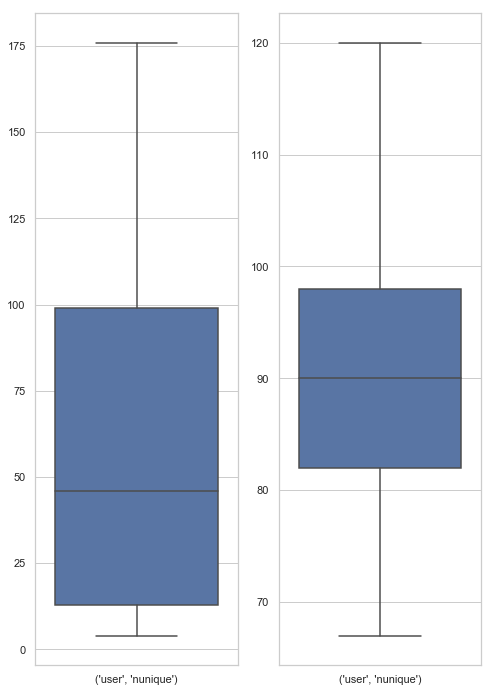

In [158]:
# tt = list(tt['user'])
# tt_bad = list(tt_bad['user'])
# full = [tt, tt_bad]
# full = map(int, full)
f, axes = plt.subplots(1, 2)
sb.set(style="whitegrid")
# ax = sb.boxplot(y=tt, showfliers=False)
sb.boxplot( data=task1_good_sc,   ax=axes[0], showfliers=False)
# sb.stripplot(data=tt, color="orange", ax=axes[0], jitter=0.2, size=2.5, showfliers=False, dodge = False )
sb.boxplot( data=task1_bad_sc,  ax=axes[1], showfliers = False)
# sb.stripplot(data=tt, color="orange", ax=axes[1], jitter=0.2, size=2.5)
# sb.despine(offset=10, trim=True)
plt.show()

# Task 2: Number of edits per editors
## My Hypothesis: 
* total number of unique editors for good articles would be less than for NotSoGood articles, because I think that a lot 
form a hypotheses in connection to article quality; (2) present the comparison between two group of articles using average and standard deviation as well as box plots.

In [ ]:
sc_good = add_data_sc[add_data_sc.article_type == 'Good']
sc_bad = add_data_sc[add_data_sc.article_type == 'NotSoGood']

In [163]:
sc_good.head()

,Article,rev_id,page_id,user,timestamp,Quality,article_type
0,Parallel computing,869792687,22770,Arjayay,2018-11-20T11:45:46Z,FA,Good
1,Parallel computing,869792656,22770,88.98.30.181,2018-11-20T11:45:28Z,FA,Good
2,Parallel computing,869394838,22770,Daiyusha,2018-11-18T09:20:26Z,FA,Good
3,Parallel computing,869380602,22770,2600:8801:983:7000:21D4:4DD3:80E2:3E60,2018-11-18T06:46:03Z,FA,Good
4,Parallel computing,869210492,22770,Jackfork,2018-11-17T03:18:43Z,FA,Good


In [169]:
task2_good_sc = sc_good.groupby(['Article','user']).agg({'user': ['count']})

In [171]:
def sum_col(df, col, new_col):
    df[new_col] = df[col].count()
    return df

In [173]:
testt = sc_good.groupby('Article').apply(sc_good, 'user', 'f_count')

TypeError: 'DataFrame' objects are mutable, thus they cannot be hashed

# Task 3: Number of talk-page posts
## My Hypothesis: 
* total number of unique editors for good articles would be less than for NotSoGood articles, because I think that a lot 
form a hypotheses in connection to article quality; (2) present the comparison between two group of articles using average and standard deviation as well as box plots.

# Task 4: Number of editors posting on talk-pages
## My Hypothesis: 
* total number of unique editors for good articles would be less than for NotSoGood articles, because I think that a lot 
form a hypotheses in connection to article quality; (2) present the comparison between two group of articles using average and standard deviation as well as box plots.

In [174]:
task4_good_talk = talk_good.groupby(['Article']).agg({'user': ['count']})
task4_good_talk.describe()

,user
,count
count,152.000000
mean,10.769737
std,35.204318
min,2.000000
25%,2.000000
50%,2.000000
75%,3.000000
max,265.000000


In [179]:
talk_good

,Article,rev_id,page_id,user,timestamp,Quality,article_type
0,Parallel computing,850357480,22173,WOSlinker,2018-07-15T11:19:09Z,FA,Good
1,Parallel computing,844288857,22173,Arthur Rubin (alternate),2018-06-03T23:33:14Z,FA,Good
2,Parallel computing,807179335,22173,Arkansalty,2017-10-26T11:59:51Z,FA,Good
3,Parallel computing,791405619,22173,JFG,2017-07-20T01:58:52Z,FA,Good
4,Parallel computing,791405528,22173,JFG,2017-07-20T01:58:00Z,FA,Good
5,Parallel computing,791398051,22173,Certes,2017-07-20T00:32:10Z,FA,Good
6,Parallel computing,791392318,22173,S≈Çawomir Bia≈Çy,2017-07-19T23:55:49Z,FA,Good
7,Parallel computing,791389948,22173,Volunteer1234,2017-07-19T23:33:40Z,FA,Good
8,Parallel computing,785782581,22173,Certes,2017-06-15T11:39:59Z,FA,Good
9,Parallel computing,781500946,22173,Certes,2017-05-21T16:33:39Z,FA,Good


In [180]:
talk_bad

,Article,rev_id,page_id,user,timestamp,Quality,article_type
1637,ACM SIGHPC,767714637,18319938,Johnsoniensis,2017-02-27T14:56:27Z,C,NotSoGood
1638,ACM SIGHPC,224007826,18319938,ShepBot,2008-07-06T22:32:40Z,C,NotSoGood
1639,ACM SIGOPS,767728421,18319940,Johnsoniensis,2017-02-27T16:33:35Z,C,NotSoGood
1640,ACM SIGOPS,224007836,18319940,ShepBot,2008-07-06T22:32:43Z,C,NotSoGood
1641,Alan Kay,767735440,18319942,Johnsoniensis,2017-02-27T17:21:23Z,C,NotSoGood
1642,Alan Kay,224007848,18319942,ShepBot,2008-07-06T22:32:47Z,C,NotSoGood
1643,Automata theory,767858834,18319943,Johnsoniensis,2017-02-28T10:35:07Z,C,NotSoGood
1644,Automata theory,224007857,18319943,ShepBot,2008-07-06T22:32:50Z,C,NotSoGood
1645,Bit,767900831,18319945,Johnsoniensis,2017-02-28T16:36:04Z,C,NotSoGood
1646,Bit,224007873,18319945,ShepBot,2008-07-06T22:32:53Z,C,NotSoGood


In [175]:
task4_bad_talk = talk_bad.groupby(['Article']).agg({'user': ['count']})
task4_bad_talk.describe()

,user
,count
count,250.000000
mean,2.860000
std,2.976548
min,1.000000
25%,2.000000
50%,2.000000
75%,3.000000
max,36.000000


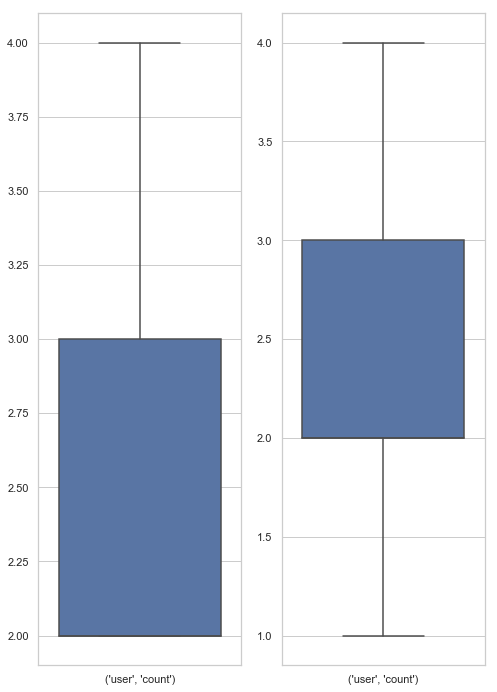

In [177]:
f, axes = plt.subplots(1, 2)
sb.set(style="whitegrid")
sb.boxplot( data=task4_good_talk,   ax=axes[0], showfliers=False)
sb.boxplot( data=task4_bad_talk,  ax=axes[1], showfliers = False)
plt.show()

# Task 5: Frequency of edits (time between edits)
## My Hypothesis: 
* total number of unique editors for good articles would be less than for NotSoGood articles, because I think that a lot 
form a hypotheses in connection to article quality; (2) present the comparison between two group of articles using average and standard deviation as well as box plots.